In [1]:
#tuodaan tarvittavat kirjastot
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#tuon ohjelmakirjaston
from statsmodels.tsa.api import SimpleExpSmoothing
#ennustemallin hyvyyttä kuvaavat luvut, mitä pienemmät luvut sen parempi
from sklearn.metrics import mean_squared_error, mean_absolute_error
#pytonin peruspakettiin ei kuulu neliöjuuri, joten tuon sen seuraavasta kirjastosta
from math import sqrt

In [2]:
#avataan data Oluen tuotantomääriä
data=pd.read_csv('http://taanila.fi/beer.csv')
data.index=pd.to_datetime(data['Month'],format='%Y-%m')
data.head()

,Month,Monthly beer production
Month,,
1956-01-01,1956-01,93.2
1956-02-01,1956-02,96.0
1956-03-01,1956-03,95.2
1956-04-01,1956-04,77.1
1956-05-01,1956-05,70.9


In [3]:
#poistan ylimääräisen rivin 'Month'
data=data.drop('Month',axis=1)
data.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


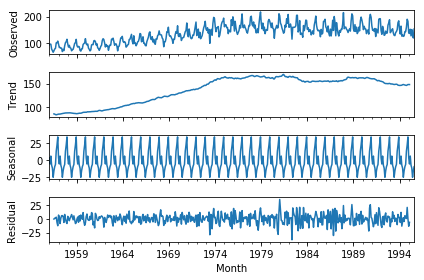

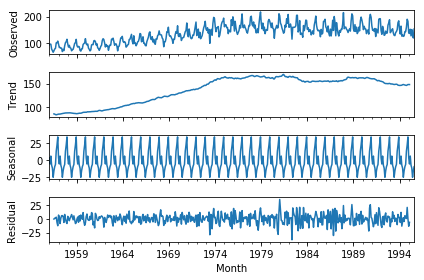

In [4]:
#funktiolla seasonal_decompose katson, mitkä tekijät aiheuttavat muutoksia oluen tuotantomäärässä
from statsmodels.tsa.api import seasonal_decompose
seasonal_decompose(data['Monthly beer production']).plot()

In [5]:
#Kausittainen vaihtelu eli 'seasonal' muuttuu merkittävästi
#tuon ohjelmakirjastosta mallin, joka huomio kausivaihtelun: ExponentialSmoothing 
from statsmodels.tsa.api import ExponentialSmoothing

In [6]:
#ensimmäisenä, kun aletaan ennustamaan MALLI SOVITETAAN DATAAN! funktiolla .fit() 
#laitan lisäparametrina kausivaihtelun pituuden: seasoal_periods
#'mul' funktio viittaa kertomiseen, 'add' lisää uuden vuosineljänneksen perusvuosineljänneksen päälle

malli = ExponentialSmoothing (data['Monthly beer production'], seasonal_periods=12, trend='add', seasonal='mul') .fit()

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


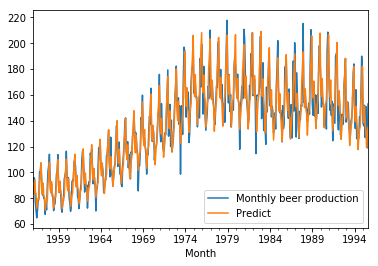

In [7]:
#malli-olion avulla lasken ennusteet: .fittedvalues()
data['Predict'] = malli.fittedvalues
data.plot()

In [8]:
#katson miltä ajankohdalta on viimeisin havainto ja laitan sen
data.tail()

,Monthly beer production,Predict
Month,,
1995-04-01,127.0,137.097606
1995-05-01,151.0,132.248655
1995-06-01,130.0,119.249562
1995-07-01,119.0,129.654186
1995-08-01,153.0,135.081334


C:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


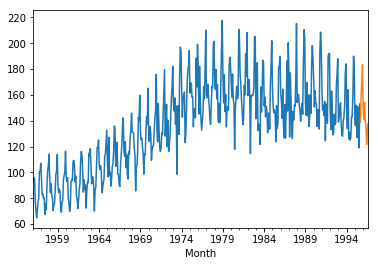

In [9]:
#lasketaan ennusteita tulevaisuudesta äsköisen mallin mukaan
#merkitsen ajankohdan josta ennustus aloitetaan: 1995-09-01
index = pd.date_range('1995-09-01', periods=12, freq='MS')

#malli-olio osaa ennustaa funktiollaan .forecast()
datap = pd.DataFrame(malli.forecast(12), index=index)
datap.columns = ['Predict']

data['Monthly beer production'].plot()
datap['Predict'].plot()

In [10]:
#mallin hyvyyden arviointi
#lasken neliöjuuren
sqrt(mean_squared_error(data['Monthly beer production'], data['Predict']))

9.772425195978073

In [11]:
#lasken virheen itseisarvojen keskiarvon
mean_absolute_error(data['Monthly beer production'], data['Predict'])

7.413264474352966

In [ ]:
#ennustemallin hyvyyttä kuvaavat luvut ovat pieniä, joten tämä malli on hyvä

